In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
img1 = cv2.imread(r"C:\Users\mrina\OneDrive\Desktop\3dproj\stage2_v2\stage2\data\milk\images\00764.jpg")
color1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(color1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread(r"C:\Users\mrina\OneDrive\Desktop\3dproj\stage2_v2\stage2\data\milk\images\00028.jpg")
color2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(color2, cv2.COLOR_RGB2GRAY)

In [3]:
detector = cv2.SIFT_create()
matcher = cv2.BFMatcher(cv2.NORM_L2)

In [4]:
keypoints_train = detector.detect(gray1, None)
keypoints_query = detector.detect(gray2, None)

# do keypoint descriptor
# keypoints_train, description_train = self.descriptor.compute(img, keypoints_train)
# keypoints_query, description_query = self.descriptor.compute(img_aug, keypoints_query)


In [5]:
kp_train = torch.tensor([[kp.pt[0], kp.pt[1], kp.angle, 0, 0, kp.size] for kp in keypoints_train])
kp_query = torch.tensor([[kp.pt[0], kp.pt[1], kp.angle, 0, 0, kp.size] for kp in keypoints_query])

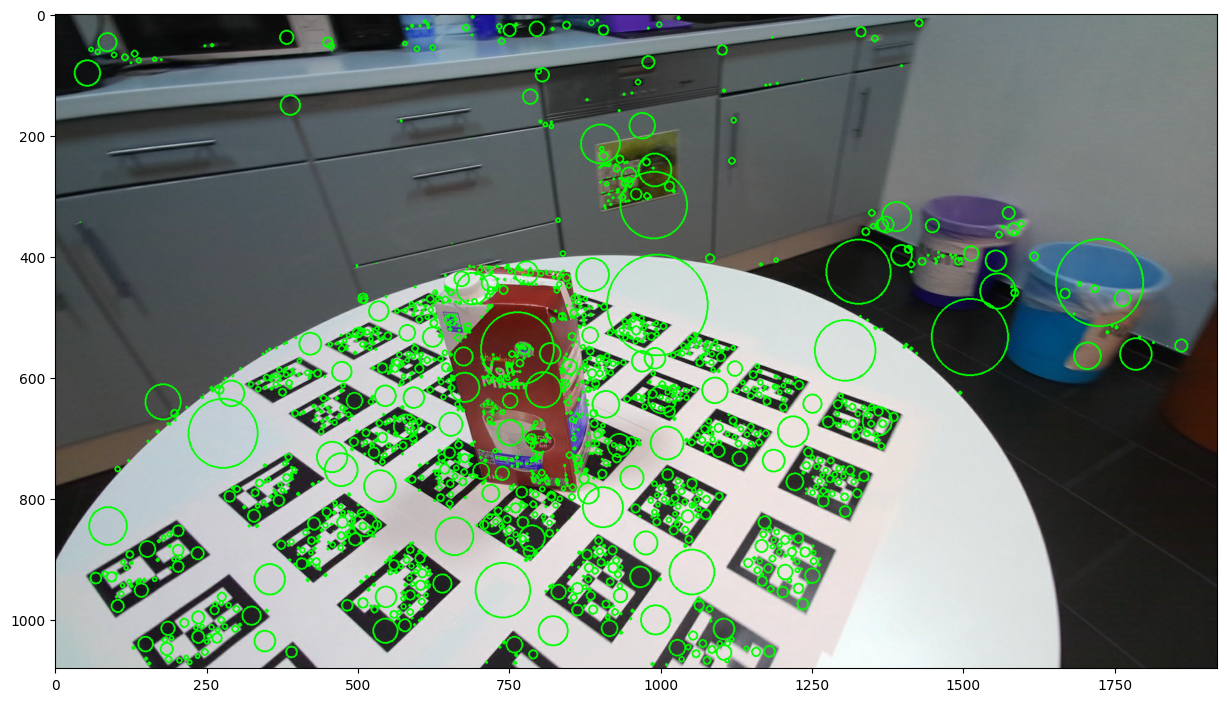

In [6]:
plt.figure(figsize=(15, 10))
img1_draw = img1.copy()
for x, y, _, _, _, s in kp_train:
    cv2.circle(img1_draw, (int(x), int(y)), int(0.5 * s), (0, 255, 0), 2)
plt.imshow(img1_draw)

In [7]:
import torch
from src.rbrief import RBRIEF
import src.match as matcher
brief = RBRIEF(seed=10)

In [8]:
desc1 = brief.compute_descriptors(torch.tensor(gray1), kp_train)
desc2 = brief.compute_descriptors(torch.tensor(gray2), kp_query)

--- Generated comparison pattern type I ---
Use far_match_mode:  False
tensor([[ 1.,  4.,  6.,  4.],
        [ 1., 15.,  1.,  6.],
        [14.,  5., 13.,  1.],
        ...,
        [11., 14.,  6.,  2.],
        [ 7.,  3.,  3.,  5.],
        [14.,  7.,  6.,  7.]])
Shape:  torch.Size([256, 4])
Descriptor shape:  torch.Size([1929, 256])
--- Generated comparison pattern type I ---
Use far_match_mode:  False
tensor([[ 1.,  4.,  6.,  4.],
        [ 1., 15.,  1.,  6.],
        [14.,  5., 13.,  1.],
        ...,
        [11., 14.,  6.,  2.],
        [ 7.,  3.,  3.,  5.],
        [14.,  7.,  6.,  7.]])
Shape:  torch.Size([256, 4])
Descriptor shape:  torch.Size([1874, 256])


In [9]:
matches = matcher.match(
    descriptors1=desc1,
    descriptors2=desc2,
    device="cpu",
    ratio=0.99,
    threshold=160
)

Performing matching


c:\Users\mrina\OneDrive\Desktop\3dproj\stage2_v2\stage2\src\match.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  matches = torch.tensor(matches, dtype=torch.long, device=device)
c:\Users\mrina\OneDrive\Desktop\3dproj\stage2_v2\stage2\src\match.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  distances = torch.tensor(distances, dtype=torch.float32, device=device)


In [10]:
matches

tensor([[   0,   62],
        [ 346, 1662],
        [ 630, 1837],
        [ 933, 1494],
        [ 382,  746],
        [1322,  233],
        [ 135, 1350],
        [1184, 1265],
        [ 532,  488],
        [1727, 1465],
        [ 410, 1609],
        [ 834,  738],
        [ 799, 1172],
        [ 580,  124],
        [1631,  891],
        [ 489,  675],
        [ 983, 1706],
        [1380,  368],
        [1444,  807],
        [ 244,  582],
        [ 937,  977],
        [ 483,  361],
        [1928, 1295],
        [1466,  362],
        [ 514,  867],
        [ 195, 1833],
        [1356,  635],
        [ 673, 1353],
        [ 100, 1696],
        [1382, 1557],
        [  86,  768],
        [1084, 1688],
        [1499,  763],
        [ 184, 1581],
        [1168,  620],
        [  85, 1288],
        [ 959, 1584],
        [ 245,  806],
        [1207,  898],
        [1237, 1254],
        [1081, 1524],
        [1105, 1298],
        [1098, 1510],
        [1827,  460],
        [1010,  142],
        [ 

In [11]:
kp1 = kp_train[matches[:, 0]]
kp2 = kp_query[matches[:, 1]]

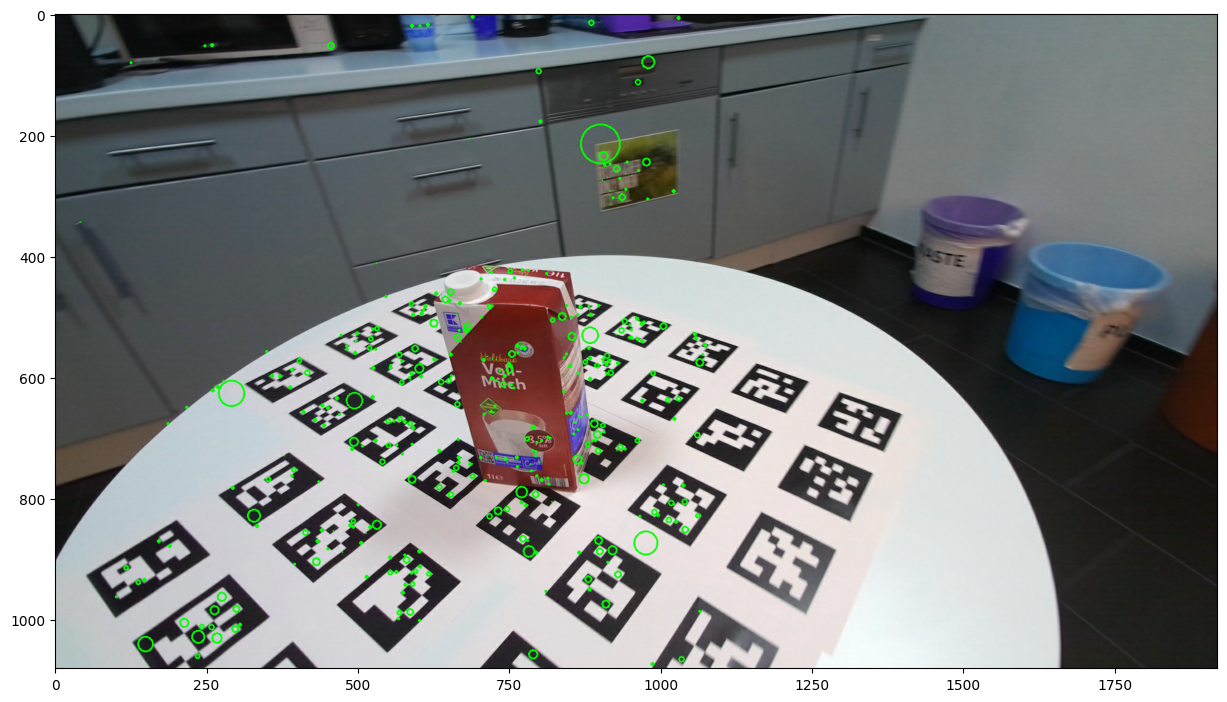

In [12]:
plt.figure(figsize=(15, 10))
img1_draw = img1.copy()
for x, y, _, _, _, s in kp1:
    cv2.circle(img1_draw, (int(x), int(y)), int(0.5 * s), (0, 255, 0), 2)
plt.imshow(img1_draw)

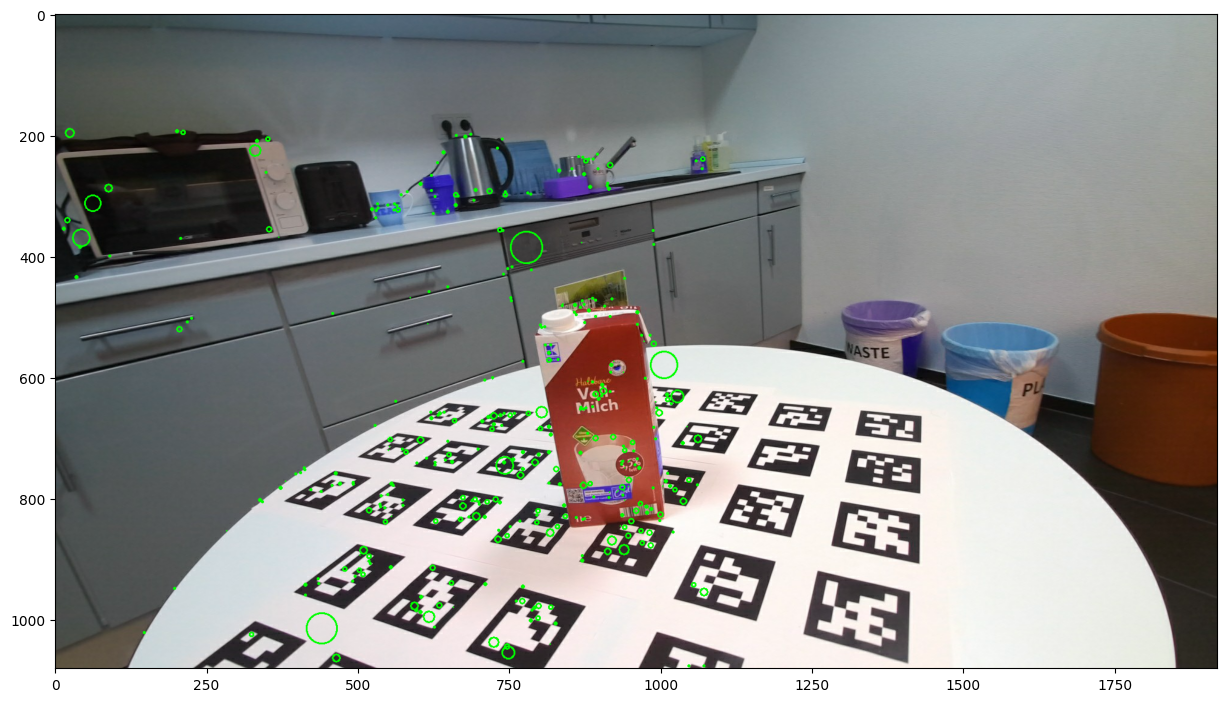

In [13]:
plt.figure(figsize=(15, 10))
img2_draw = img2.copy()
for x, y, _, _, _, s in kp2:
    cv2.circle(img2_draw, (int(x), int(y)), int(0.5 * s), (0, 255, 0), 2)
plt.imshow(img2_draw)